## Data pre-processing

* Import the required libraries
* Load the dataset from Keras
* Normalize the data
* Convert the target into categorical values
* Apply data augmentation techniques on the train data

## Building the model

* Construct a basic CNN model without the data augmentation techniques
* Construct a CNN model with data augmentation
* Evaluate both models and compare the model performance

__Data Augmentation for CNN
For problems like image classification and segmentation, there is a need for a large amount of data. Sometimes, if the data availability is less, using data augmentation techniques can help in increasing the amount of data in the dataset. In this technique, we generate new instances of images by cropping, flipping, zooming, shearing an original image. So, whenever the training lacks the image dataset, using augmentation, we can create thousands of images to train the model perfectly.__

__Data pre-processing__

__Import the required libraries
Load the dataset from Keras
Normalize the data
Convert the target into categorical values
Apply data augmentation techniques on the train data
Building the model__

__Construct a basic CNN model without the data augmentation techniques
Construct a CNN model with data augmentation
Evaluate both models and compare the model performance___

4423680/4422102 [==============================] - 0s 0us/step


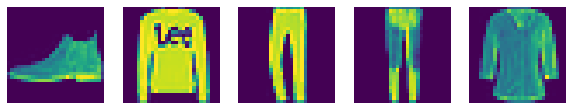

Labels: [9 2 1 1 6]


In [8]:
import numpy as np
from keras.utils import np_utils
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i]) 
    plt.axis('off')
plt.show()
print('Labels: %s' % (y_test[0:5]))

In [9]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

# Data Augmentation

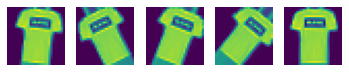

In [11]:
from keras.preprocessing.image import ImageDataGenerator

#Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False, 
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,  
    zca_whitening=False,
    rotation_range=50,
    width_shift_range=0.01, 
    height_shift_range=0.01, 
    horizontal_flip=False, 
    vertical_flip=False)

datagen.fit(X_train)

from matplotlib import pyplot as plt

gen = datagen.flow(X_train[1:2], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

# Building the CNN Model

In [12]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))

model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32,epochs=10,validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6512 - accuracy: 0.7539 - val_loss: 0.4615 - val_accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4657 - accuracy: 0.8275 - val_loss: 0.4134 - val_accuracy: 0.8451
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4248 - accuracy: 0.8420 - val_loss: 0.3765 - val_accuracy: 0.8582
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4041 - accuracy: 0.8505 - val_loss: 0.3687 - val_accuracy: 0.8681
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3847 - accuracy: 0.8563 - val_loss: 0.3576 - val_accuracy: 0.8689
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3740 - accuracy: 0.8625 - val_loss: 0.3450 - val_accuracy: 0.8736
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3657 - accuracy: 0.8644 - val_loss: 0.3398 - val_accuracy:

# Evaluate Model

In [13]:
print('Test accuracy:', model.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8856
Test accuracy: [0.32260754704475403, 0.8855999708175659]
